In [1]:
%pylab inline

from scipy.integrate import solve_ivp

Populating the interactive namespace from numpy and matplotlib


In [2]:
r = lambda x,y : np.sqrt(x**2+y**2) #Define r
close_r = lambda f: lambda x,y : f(x,y,r(x,y)) # Define the substitution of r

#Defining the Christoffel Symbols

C_xx_x_wr = lambda x,y,r: 0
C_xy_x_wr = lambda x,y,r: - y / (2*r**2) 
C_yx_x_wr = lambda x,y,r: - y / (2*r**2)
C_yy_x_wr = lambda x,y,r: x / (r**2)
C_xx_y_wr = lambda x,y,r: y / (r**2)
C_xy_y_wr = lambda x,y,r: - x / (2*r**2)
C_yx_y_wr = lambda x,y,r: - x / (2*r**2)
C_yy_y_wr = lambda x,y,r: 0

#Substitution the r

C_xx_x = close_r(C_xx_x_wr)
C_xy_x = close_r(C_xy_x_wr)
C_yx_x = close_r(C_yx_x_wr)
C_yy_x = close_r(C_yy_x_wr)

C_xx_y = close_r(C_xx_y_wr)
C_xy_y = close_r(C_xy_y_wr)
C_yx_y = close_r(C_yx_y_wr)
C_yy_y = close_r(C_yy_y_wr)

#Defining the geodesic equations
def rhs_chr(t,s):
    x,y,u,v = s
    
    udot = C_xx_x(x,y) * u**2 + 2 * C_xy_x(x,y) * u * v +  C_yy_x(x,y) * v**2
    vdot = C_xx_y(x,y) * u**2 + 2 * C_xy_y(x,y) * u * v +  C_yy_y(x,y) * v**2
    
    return u,v,-udot,-vdot

fd0 = 1

In [3]:
#Solving the geodesic equations
sol = solve_ivp(rhs_chr, [0, 10], [1, 0, 0,2],rtol=1e-7)

Text(0.5, 1.0, 'Examples of geodesics')

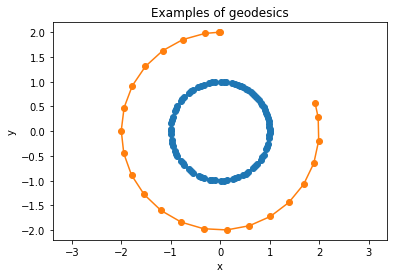

In [4]:
#Solving with initial conditions t:[0,10] [x0,y0,x'0,y'0]
sol = solve_ivp(rhs_chr, [0, 10], [1, 0, 0,2],rtol=1e-7)
plt.plot(sol.y[0,:],sol.y[1,:],'o-')


sol = solve_ivp(rhs_chr, [0, 10], [0, 2, -1,0],rtol=1e-7)
plt.plot(sol.y[0,:],sol.y[1,:],'o-')

plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Examples of geodesics')
#plt.savefig('Examples_of_geodesics.png')

Text(0, 0.5, 'y')

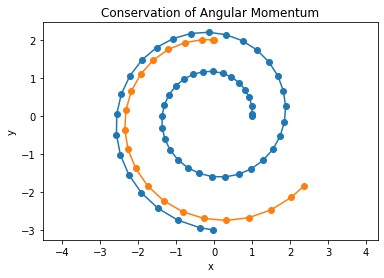

In [5]:
#Solving with initial conditions t:[0,10] [x0,y0,x'0,y'0]
sol = solve_ivp(rhs_chr, [0, 10], [1, 0, .2,2],rtol=1e-7)
plt.plot(sol.y[0,:],sol.y[1,:],'o-')


sol = solve_ivp(rhs_chr, [0, 10], [0, 2, -1,.1],rtol=1e-7)
plt.plot(sol.y[0,:],sol.y[1,:],'o-')

plt.axis('equal')

plt.title('Conservation of Angular Momentum')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('Conservation of Angular Momentum.png')

In [6]:
def rhs_chr_passive_velocity_transport(t,s):
    x,y,u,v,fxd,fyd = s
    uc,vc,udc,vdc = rhs_chr(t,s[:4])
    
    fxd_dot = - ( C_xx_x(x,y) * u*fxd + C_xy_x(x,y) * u * fyd + C_xy_x(x,y) * fxd * v  +  C_yy_x(x,y) * fyd * v )
    fyd_dot = - ( C_xx_y(x,y) * u*fxd + C_xy_y(x,y) * u * fyd + C_xy_y(x,y) * fxd * v  +  C_yy_y(x,y) * fyd * v )
    
        
    return np.array([uc,vc,udc,vdc, fxd_dot, fyd_dot])

In [7]:
tau = 1

def rhs_chr_active_friction(t,s):
    
    uc,vc,udc,vdc, fxd_dot, fyd_dot = rhs_chr_passive_velocity_transport(t,s)
    
    a = fd0
    
    fdx = s[4]
    fdy = s[5]
    normfd = np.sqrt(fdx**2 + fdy**2)
    
    udc += (a*fdx/normfd - uc)/tau #vd/Norm[vd] \alpha
    vdc += (a*fdy/normfd - vc)/tau
    
    return np.array([uc,vc,udc,vdc, fxd_dot, fyd_dot])
    

(-1.6499216345767893,
 1.6499962683131804,
 -1.2669624436433247,
 1.6317404889569906)

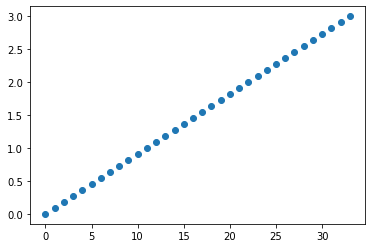

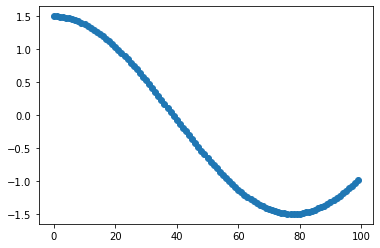

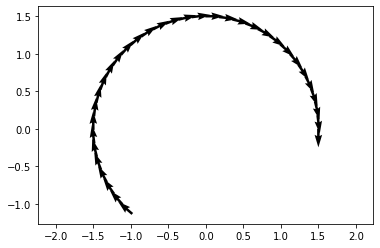

In [8]:
#------------------------------------
#Visuals for just parallel transport
#------------------------------------

sol = solve_ivp(rhs_chr_passive_velocity_transport, [0, 3], [1.5, 0, 0, 2, 0 ,-1],rtol=1e-7,t_eval = np.linspace(0,3,100))
plt.plot(sol.t[::3],'o') #Plotting the time
plt.figure()
plt.plot(sol.y[0,:],'o') #Plotting the x component

#Plotting the trajectory with forcing or velocity indicated with the arrows
plt.figure()
plt.quiver(sol.y[0,::3],sol.y[1,::3],sol.y[4,::3],sol.y[5,::3]) 
#plt.plot(sol.y[0,:],sol.y[1,:],'o-')
plt.axis('equal')

Text(0, 0.5, 'y')

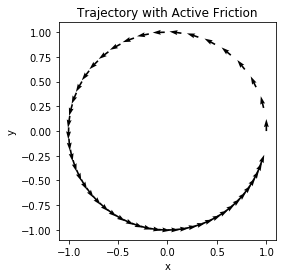

In [9]:
#------------------------------------
#Visuals for the active friction
#------------------------------------
fd0 = 1
sol = solve_ivp(rhs_chr_active_friction, [0, 4], [1, 0, 0, 3, 0 ,fd0]
                ,rtol=1e-7
                ,t_eval = np.linspace(0,4,100))
sstep=2
plt.quiver(sol.y[0,::sstep],sol.y[1,::sstep],sol.y[4,::sstep],sol.y[5,::sstep])
plt.axis('square')
plt.title('Trajectory with Active Friction')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('active_friction.png')

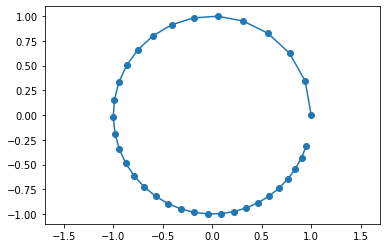

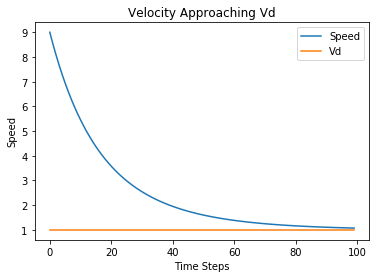

In [10]:
#Plotting the trajectory with constant time steps
plt.plot(sol.y[0,::3],sol.y[1,::3],'o-')
plt.axis('equal')

#Plotting a figure of the speed
plt.figure()
plt.plot(sol.y[2,:]**2+ sol.y[3,:]**2,label = "Speed")
plt.plot(sol.y[4,:]**2+ sol.y[5,:]**2, label = "Vd")

plt.title('Velocity Approaching Vd')
plt.ylabel('Speed')
plt.xlabel('Time Steps')
plt.legend()

#plt.savefig('Velocity_Appraoching_vd.png')

In [11]:
#------------------------------------
#Everythig works as it should
#------------------------------------

In [12]:
#------------------------------------
#Inplementing the confinement
#------------------------------------
alpha = 1

r = lambda x,y : np.sqrt(x**2+y**2) #Define r
close_r = lambda f: lambda x,y : f(x,y,r(x,y)) # Define the substitution of r

potx_wr = lambda x,y,r: 2*(r-1)*x/r
poty_wr = lambda x,y,r: 2*(r-1)*y/r
    
potx = close_r(potx_wr)
poty = close_r(poty_wr)
    
def rhs_confinement(t,s):
    x = s[0]
    y = s[1]
    uc,vc,udc,vdc, fxd_dot, fyd_dot = rhs_chr_active_friction(t,s) 
    
    udc_v = udc - alpha*potx(x,y)
    vdc_v = vdc - alpha*poty(x,y)

    return np.array([uc,vc,udc_v,vdc_v, fxd_dot, fyd_dot])



In [13]:
#Making the reference circle
theta = np.linspace(0, 2*np.pi, 100)

rho = np.sqrt(1.0)

x1 = rho*np.cos(theta)
x2 = rho*np.sin(theta)
#plt.plot(x1,x2,'-')

(-1.239000814086695,
 2.154238134004128,
 -1.1274647115891459,
 1.1682941409175593)

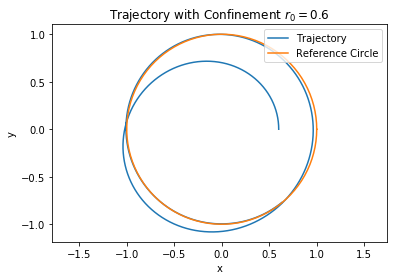

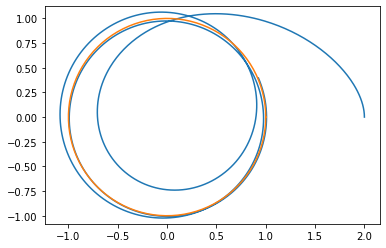

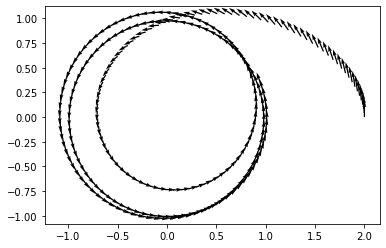

In [14]:
soltime = 10
tstep = 4
fd0 = 1
r0 = 0.6

sol = solve_ivp(rhs_confinement, [0, soltime], [r0, 0, 0, 2, 0 ,fd0],rtol=1e-7,t_eval = np.linspace(0,soltime,100000))

plt.plot(sol.y[0,:],sol.y[1,:],'-',label = "Trajectory")
plt.plot(x1,x2,'-', label = "Reference Circle")
plt.axis('equal')

plt.title(r'Trajectory with Confinement $r_0 = %.1f $' %(r0))
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc = 'upper right')

#plt.savefig('Traectory_with_confinement_r0%.1f.png' %(r0))

fd0 = 2
plt.figure()
sol = solve_ivp(rhs_confinement, [0, soltime], [2, 0, 0, 1, 0 ,fd0],rtol=1e-7,t_eval = np.linspace(0,soltime,1000))

plt.plot(sol.y[0,:],sol.y[1,:],'-')
plt.plot(x1,x2,'-')
plt.axis('equal')

#Plotting the trajectory with forcing or velocity indicated with the arrows
plt.figure()
plt.quiver(sol.y[0,::tstep],sol.y[1,::tstep],sol.y[4,::tstep],sol.y[5,::tstep]) 
#plt.plot(sol.y[0,:],sol.y[1,:],'o-')
plt.axis('equal')

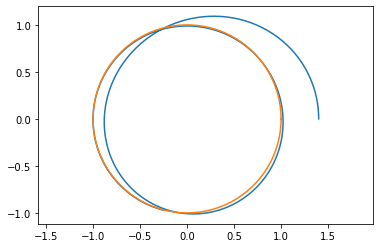

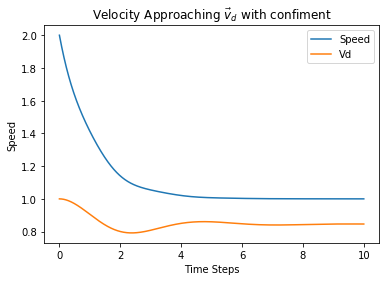

In [15]:
#Plotting the trajectory with constant time steps
fd0 = 1

sol = solve_ivp(rhs_confinement, [0, 10], [1.4, 0, 0, 2, 0 ,fd0],rtol=1e-7,t_eval = np.linspace(0,10,2000))
plt.plot(sol.y[0,::3],sol.y[1,::3],'-')
plt.plot(x1,x2,'-')
plt.axis('equal')


#Plotting a figure of the speed
plt.figure()
plt.plot(sol.t, sqrt(sol.y[2,:]**2+ sol.y[3,:]**2), label =  "Speed")
plt.plot(sol.t, sqrt(sol.y[4,:]**2+ sol.y[5,:]**2), label = "Vd")
plt.plot(1)

plt.title(r'Velocity Approaching $\vec{v}_d$ with confiment')
plt.ylabel('Speed')
plt.xlabel('Time Steps')
plt.legend()

#plt.savefig('Velocity_Appraoching_vd_with_confinement.png')

In [16]:
#---------------------------------------
#Implementing the Stochastic Terms
#---------------------------------------
import sdeint
import pickle

In [20]:
#Combining with stochastic terms
alpha = 1
r0 = 1
def degen_noise(s,t):
    eps = 0.07
    B = np.diag([0,0,eps,eps,0,0]) # diagonal, so independent driving Wiener processes
    return B

def no_noise(s,t):
    B = np.diag([0,0,0,0,0,0])
    return B

swap_arg = lambda f : lambda x,y : f(y,x)

def noise_gen():
    return [no_noise,no_noise,degen_noise,no_noise,no_noise]

fd0 = 1
sol = sdeint.itoint(swap_arg(rhs_confinement) #rhs_chr_passive_velocity_transport)
                    ,  degen_noise
                    ,  np.array([r0, 0.00000000001, 0, 2, 0 ,fd0])
                    ,  np.linspace(0,100,10000))
                    #,rtol=1e-7,t_eval = np.linspace(0,3,100))

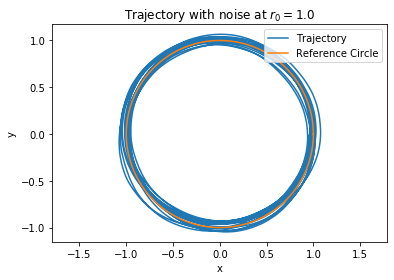

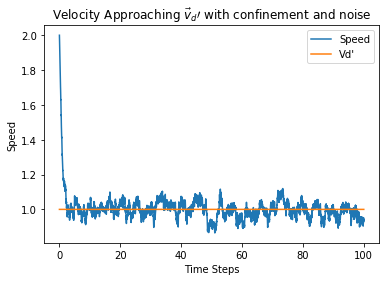

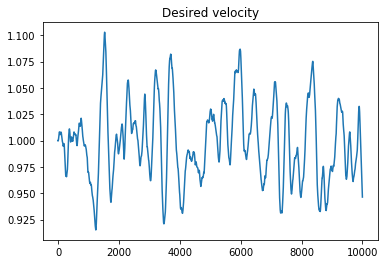

In [22]:
plt.plot(sol[:,0],sol[:,1],'-', label = "Trajectory")
plt.plot(x1,x2,'-', label = "Reference Circle" )
plt.title(r'Trajectory with noise at $r_0 = %.1f$'%(r0))
plt.axis('equal')

plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc = 'upper right')

#plt.savefig('Stohastic_Trajectory.png')
normfd = sqrt(sol[:,4]**2+ sol[:,5]**2)
time  = np.linspace(0,100,10000)
plt.figure()
plt.title(r'Velocity Approaching $\vec{v}_d\prime$ with confinement and noise')
plt.plot(time, sqrt(sol[:,2]**2+ sol[:,3]**2), label = "Speed")
plt.plot(time, sqrt(sol[:,4]**2+ sol[:,5]**2)/normfd, label = "Vd'")

plt.ylabel('Speed')
plt.xlabel('Time Steps')
plt.legend()

#plt.savefig('Stochastic_Desired_velo_fixed.png')


plt.figure()
plt.title('Desired velocity')
plt.plot(sol[:,4]**2+ sol[:,5]**2)

In [21]:
#----------------------------------------------------------------------------------------------------------
# Solving for "Samplesize" trajectories \\\ WARNING THIS CELL TAKES A VERY LONG TIME \\\ 
#----------------------------------------------------------------------------------------------------------

samplesize = 1000
fd0 = 1
tau = 1
alpha = 1
time = np.linspace(0,200,5000)

simu = []

#INCOMMENT THESE LINES
#for i in range(0,samplesize):
    #sol = sdeint.itoSRI2(swap_arg(rhs_confinement) #rhs_chr_passive_velocity_transport)
                    #,  degen_noise
                    #,  np.array([1, 0e-10, 0, 1, 0,fd0])
                    #,  time)
    
    #simu.append(sol)

#---------------------------------------------------------------------------------------------
####simu = pickle.load(open('1000_trajec 200_sec 5000_time_steps [1 0e-10 0 1 0 fd0].dat','rb'))
samplesize = len(simu)
timesteps = len(simu[1])
shape(simu)

(1000, 5000, 6)

In [22]:
import pandas as pd

In [23]:
data = pd.DataFrame([] ,columns = ['x','y','vx','vy','fdx','fdy'])
for i in range(samplesize):
    trajec = simu[i]    
    temp = pd.DataFrame(trajec, columns = ['x','y','vx','vy','fdx','fdy'])
    data = data.append(temp)
    

angle = round(np.arctan2(data['y'],data['x']),2)    
radius = np.sqrt(np.square(data['x'])+np.square(data['y']))

data['r'] = radius
data['theta'] = angle
data = data.reset_index(drop=True)
data.head()
#max(data['theta']) - min(data['theta'])
len(data)

5000000

In [27]:
mean_data = []
for i in range(int(round(min(data['theta']),2)*100),int(round(max(data['theta']),2)*100)):
    b = i/100
    a1 = data.loc[data['theta'] == b]['x'].mean()
    a2 = data.loc[data['theta'] == b]['y'].mean()
    a3 = data.loc[data['theta'] == b]['vx'].mean()
    a4 = data.loc[data['theta'] == b]['vy'].mean()
    a5 = data.loc[data['theta'] == b]['fdx'].mean()
    a6 = data.loc[data['theta'] == b]['fdy'].mean()
    
    mean_data += [[a1,a2,a3,a4,a5,a6]]
    
mean_data = np.array(mean_data).T.tolist()


(-1.1000308890853678,
 1.0999672249212655,
 -1.0995328051535649,
 1.0997535598830996)

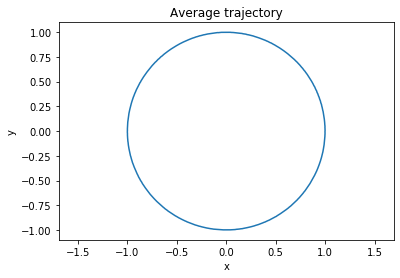

In [25]:
#plt.figure(figsize = (8,8)) #plotting the mean trajectory and fitting an ellipse
#plt.polar(mean_traj[1],mean_traj[0]);
plt.plot(mean_data[0],mean_data[1])
plt.title('Average trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')

Text(0.5, 1.0, 'Average Radius vs Angle')

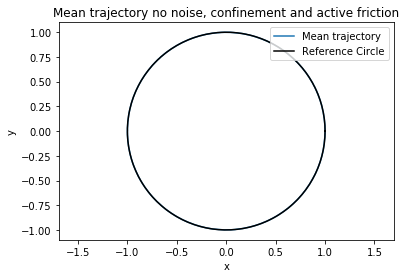

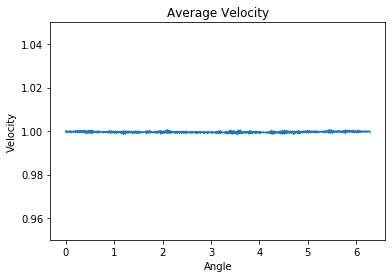

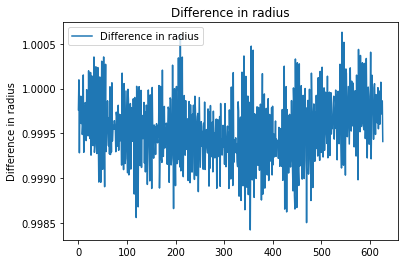

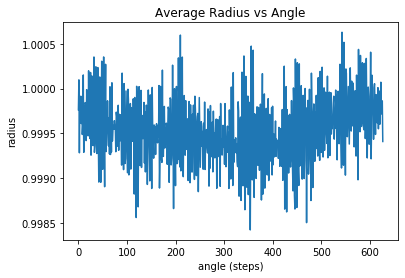

In [38]:
#-------------------------------------
#Calculating the avarage trajectory
#-------------------------------------
mean = mean_data

plt.plot((mean[0])[:],(mean[1])[:], label = 'Mean trajectory')
plt.plot(x1,x2,'k-', label = "Reference Circle" )
plt.legend(loc = 1)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.title('Mean trajectory no noise, confinement and active friction')

ang = linspace(0,np.pi*2,len(mean[0]))
normfd = sqrt(np.square((mean[4])[:])+np.square((mean[5])[:]))
plt.figure()
plt.plot(ang,sqrt(np.square((mean[0])[:])+np.square((mean[1])[:])), label = 'speed')
#plt.plot(ang,sqrt(np.square((mean[4])[:])+np.square((mean[5])[:]))/normfd, '-', label = 'vd')
plt.ylim(0.95,1.05)
#plt.legend()
plt.xlabel('Angle')
plt.ylabel('Velocity')
plt.title('Average Velocity')

plt.figure()
diff = np.sqrt(np.square((mean[0])[:])+np.square((mean[1])[:]))
plt.plot(diff, label = 'Difference in radius')
plt.legend()
#plt.xlabel('Angle')
plt.ylabel('Difference in radius')
plt.title('Difference in radius')

plt.figure()
plt.plot(np.sqrt(np.square((mean[0])[:])+np.square((mean[1])[:])))
plt.ylabel('radius')
plt.xlabel('angle (steps)')
plt.title('Average Radius vs Angle')

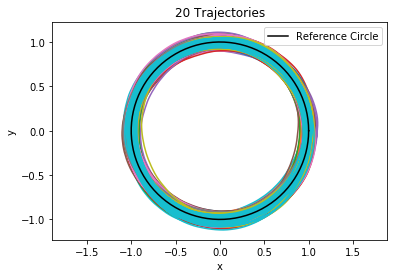

In [292]:
#---------------------------------------------------------
# Plotting 20 trajectories on top of each other
#---------------------------------------------------------
n = 20
for i in range(0,min(n,samplesize)):
    plt.plot((simu[i])[:,0],(simu[i])[:,1])

plt.plot(x1,x2,'k-', label = "Reference Circle" )
plt.title(r'%.0f Trajectories' %(n))
plt.axis('equal')

plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc = 'upper right');

#plt.savefig('Stohastic_Trajectory_20trajec.png')